In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Install NLTK and download 'vader_lexicon' if you haven't already
!pip install nltk
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')

# Import SentimentIntensityAnalyzer from nltk.sentiment.vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# Load dataset
data = pd.read_csv('/content/blogs.csv')
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [12]:
# Exploratory Data Analysis
print("Dataset Shape:", data.shape)
print("Dataset Columns:", data.columns)
print("Dataset Head:\n", data.head())


Dataset Shape: (2000, 2)
Dataset Columns: Index(['Data', 'Labels'], dtype='object')
Dataset Head:
                                                 Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [13]:
# Data Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['Data'] = data['Data'].apply(preprocess_text)

In [14]:
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Data'])
y = data['Labels']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(<1600x53477 sparse matrix of type '<class 'numpy.float64'>'
 	with 213585 stored elements in Compressed Sparse Row format>,
 <400x53477 sparse matrix of type '<class 'numpy.float64'>'
 	with 48469 stored elements in Compressed Sparse Row format>,
 968          rec.sport.baseball
 240     comp.os.ms-windows.misc
 819             rec.motorcycles
 692                misc.forsale
 420       comp.sys.mac.hardware
                  ...           
 1130                  sci.crypt
 1294            sci.electronics
 860             rec.motorcycles
 1459                  sci.space
 1126                  sci.crypt
 Name: Labels, Length: 1600, dtype: object,
 1860          talk.politics.misc
 353     comp.sys.ibm.pc.hardware
 1333                     sci.med
 905           rec.sport.baseball
 1289             sci.electronics
                   ...           
 965           rec.sport.baseball
 1284             sci.electronics
 1739       talk.politics.mideast
 261      comp.os.ms-windows.misc
 535 

In [15]:
# Naive Bayes Model for Text Classification
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Evaluate Naive Bayes Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.81
Precision: 0.8260840677568618
Recall: 0.8229335475643692
F1-score: 0.8053962603177153


In [16]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Data'].apply(analyze_sentiment)

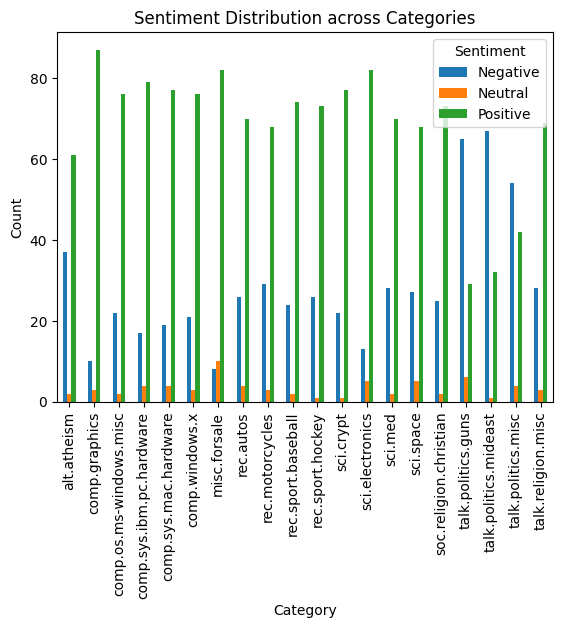

In [17]:
# Distribution of Sentiments across Categories
sentiment_dist = data.groupby('Labels')['Sentiment'].value_counts().unstack()
sentiment_dist.plot(kind='bar')
plt.title('Sentiment Distribution across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
